In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [2]:
data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [3]:
## Merged imdb.title.basics.csv.gz and imdb.title.ratings.csv.gz on the column 'tconst' with an inner join to eliminate 
## non-matching items.
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [4]:
## Renamed 'primary_title' to 'title' in order to smoothly merge this dataframe with bom.movie_gross.csv.gz.
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [5]:
## Merged IMDB and BOM data into one dataframe
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [6]:
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'numvotes']]

In [7]:
movie_titles.dropna(axis=0, how='any', inplace=True)

In [8]:
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [9]:
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [11]:
movie_titles_popularity = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year', 'numvotes']]

In [13]:
def count_genre(x):
    data_plot = movie_titles_popularity[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [14]:
total_genre_movies = count_genre('genres')
total_genre_movies.head()

Drama        950
Comedy       604
Action       464
Adventure    368
Thriller     292
dtype: int64

Text(0, 0.5, 'Genres')

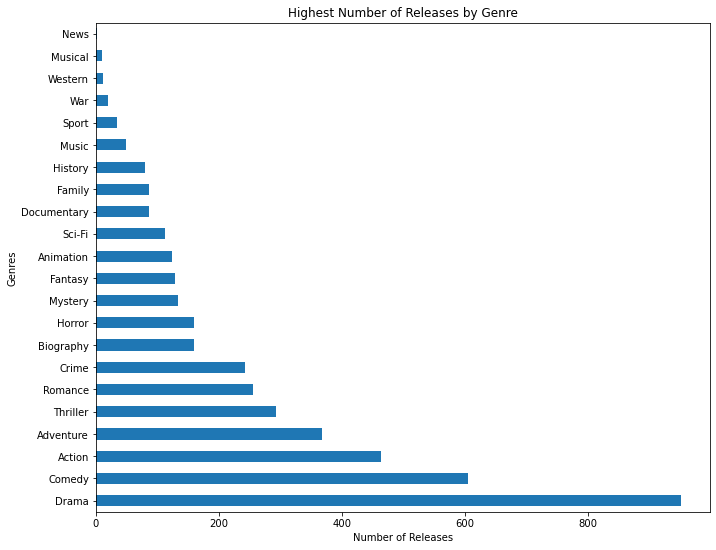

In [15]:
total_genre_movies.plot(kind='barh', figsize=(11,9))
plt.title('Highest Number of Releases by Genre')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')

In [16]:
##Creates an alphabetized list of genres that are separated

unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [17]:
## Changed variable name of list for clarity
genre_list = movie_genres
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [19]:
## Mapped a list that could be iterated through and created two arrays to set up a new dataframe
genre_details = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
popularity = np.array(movie_titles_genres['numvotes'])

In [20]:
## Created a new dataframe full of NaN values, then wrote a for loop to interate through the dataframe and replace the null values with the sum of 'total_gross

popularity_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
popularity_df = popularity_df.fillna(value = 0.0)
z = 0
for i in genre_details:
    split_genre = list(map(str, i.split(',')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [38]:
popularity_df.head()
popularity_df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000
mean,2710628.0000,2849841.2273,2813532.2727,2936295.3636,2668502.6818,2237621.0909,2095717.2273,1676458.9091,1169866.5000
std,2968265.0475,3163818.1672,3169671.9991,3397118.8064,3360209.3107,2755869.8394,2608116.4880,2021405.5099,1456623.2818
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,343431.7500,227365.2500,428624.5000,171162.0000,225199.2500,320504.0000,132609.0000,80343.5000,151280.7500
50%,1711372.0000,1308934.0000,1577142.0000,1782539.5000,1070121.5000,937500.5000,1554049.5000,1084154.5000,506350.0000
75%,3184754.5000,4695966.0000,3231851.7500,5266512.2500,4239762.7500,2972035.7500,2188260.0000,2278021.2500,1296271.2500
max,8894404.0000,9839946.0000,9683590.0000,10025440.0000,10422221.0000,8293481.0000,8532350.0000,6729552.0000,5103660.0000


In [39]:
def calculate_std(x):
    return (x - x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,2.1106,2.1790,2.2176,2.0308,2.3618,2.0581,2.5260,2.5586,2.7642
Adventure,1.9573,1.4135,1.6359,1.9625,1.9556,2.0708,2.2570,2.1347,2.3666
Animation,-0.0366,-0.4755,-0.3742,-0.3703,-0.4746,-0.4101,-0.1029,-0.4003,-0.5193
Biography,-0.2599,-0.6313,-0.5783,0.1334,-0.2200,-0.0161,-0.2141,-0.1777,0.0255
Comedy,1.4455,1.3851,1.5018,0.8728,0.7156,1.2976,1.2492,0.9933,0.7845


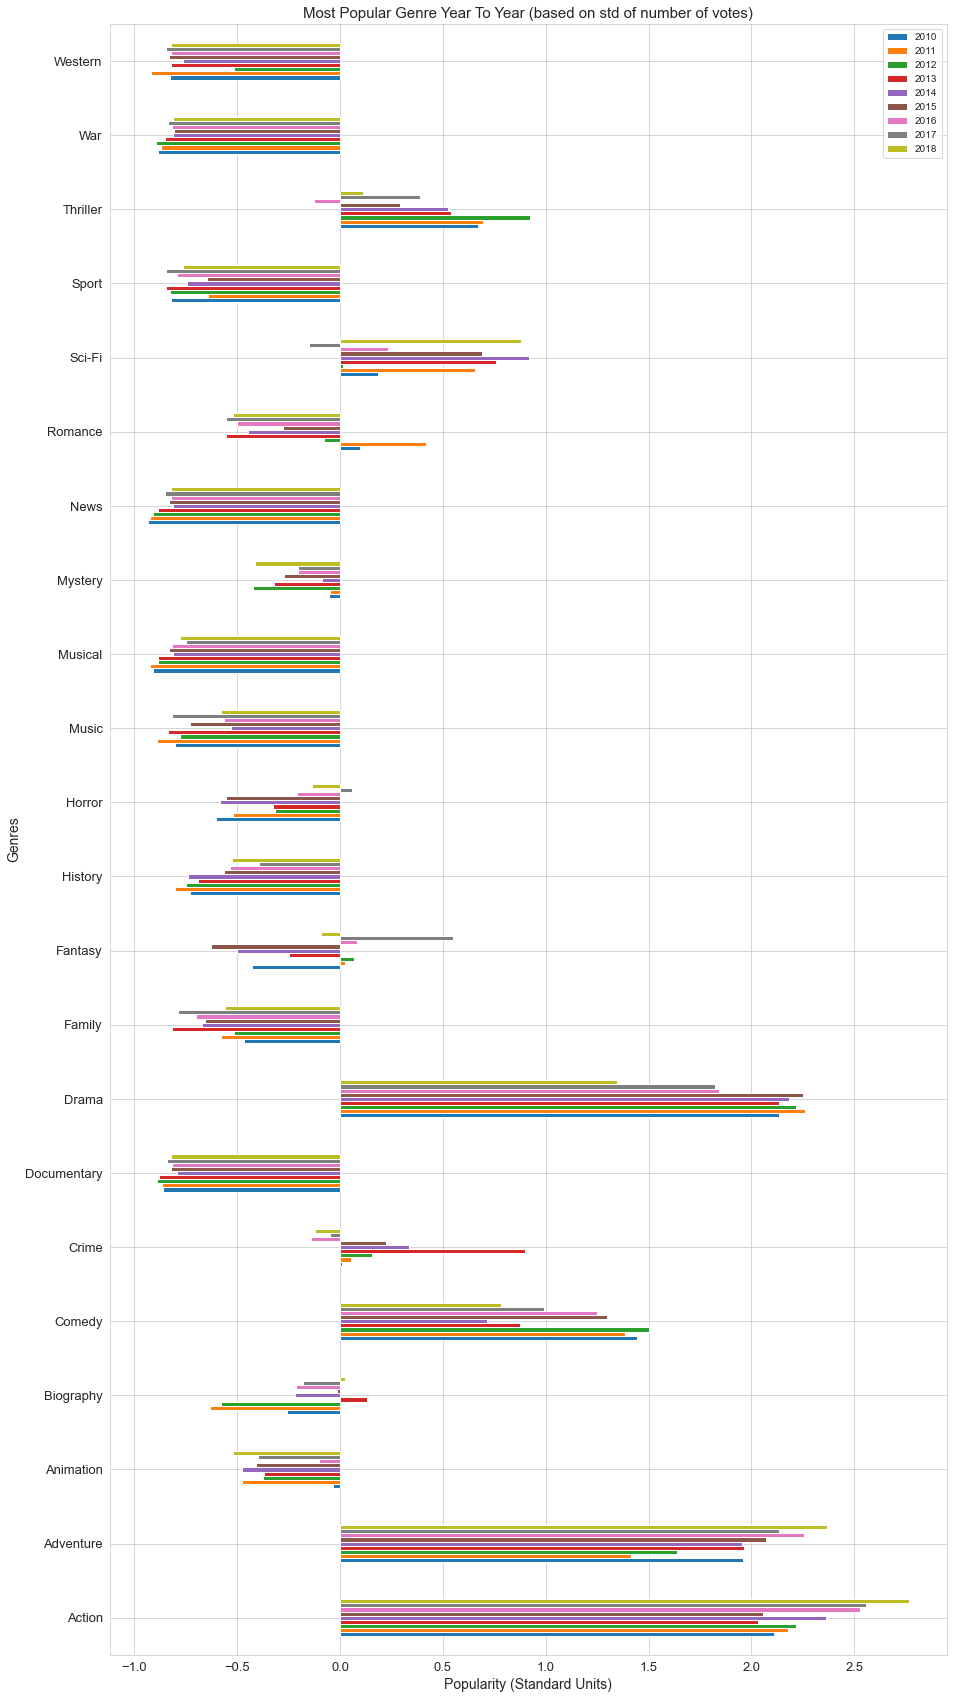

In [42]:
popular_genre.plot(kind='barh',figsize = (15,30),fontsize=13)
plt.title("Most Popular Genre Year To Year (based on std of number of votes)",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")